Pandas es una librería de Python pensada para manejar datos con la idea de que estos están en un formato de tabla. Es muy usada en análisis de grandes cantidades de datos o de series de valores que tengan una evolución temporal. Es un reemplazo muy eficiente de las planillas de cálculo.
En el caso particular de la Astronomía, la librería AstroPy tiene integrada internamente un manejo de tablas similar a Pandas.



# Cargando Pandas


Para usar Pandas primero importamos la libreria
como se hace siempre con la orden **import** y en
este caso sería:



In [1]:
import pandas as pd

Es muy común que se lo importe con el nombre pd

# Tablas - DataFrame

Un **DataFrame** is una variable de Pandas a la cual le puedo cargar **toda una tabla**, incluyendo el nombre
de las columnas y el nombre de la filas. 
Lo podría hacer de esta manera:

In [2]:
pd.DataFrame({'Blanco': [22, 61], 'Negro': [148, 2], 'Rojo': [31,10]})

,Blanco,Negro,Rojo
0,22,148,31
1,61,2,10


En este comando ya se pueden apreciar varias cosas que caracterizan al uso de Pandas:

>* Pandas está diseñado para manejar tablas.
>* Estas son de cualquier tamaño, incluso de un tamaño apreciablemente grande.
>* Los datos en Panda tienen una estructura que describiremos a continuación, pero que conserva todoas las propiedades de la tabla original.


Ene le ejmeplo es importante notar que "Blanco", "Negro" y "Rojo" son nombres de la columnas, mientras 
que al no indicar nombre de las filas estas tienen un número de índice que comienza a contarse en "0"

Las tablas no se limitan sólo a números pueden contener cualquier variable básica de Python. Por ejemplo, textos:

In [3]:
pd.DataFrame({'Roberto': ['Me gustó', 'Espantoso'], 'Ana': ['Muy Bueno', 'Regular']})

,Roberto,Ana
0,Me gustó,Muy Bueno
1,Espantoso,Regular


Aparte de la estructura tipo diccionario que me sirve para cargar las columnas y darles nombre, también
como se indicó anteriormente puedo darle nombre a las filas. Estos nombres de las filas se consideran 
como los índices de la tabla y por ello se los declara con el comando **index**. Este
se usa como en el ejemplo siguiente:

In [4]:
pd.DataFrame({'Roberto': ['Me gustó', 'Espantoso'],
             'Ana': ['Muy Bueno', 'Regular']},
             index=['Producto A', 'Producto B'])

,Roberto,Ana
Producto A,Me gustó,Muy Bueno
Producto B,Espantoso,Regular


# Series - pd.Series

Las **series** en comparación con los DataFrames son sólo una secuencia de valores, es dedir, una lista. En cierta manera 
vuelven a representar las variables "listas" del Python original, pero como veremos más adelante, son bastante 
más sofisticadas que las originales.

In [5]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

Una serie en Panda se puede considerar como una columna individual de un DataFrame, entonces también tiene asignado un índice.
Por ejemplo:

In [6]:
pd.Series([30, 35, 40], index=['2015 Ventas', '2016 Ventas', '2017 ventas'], name='Producto A')

2015 Ventas    30
2016 Ventas    35
2017 ventas    40
Name: Producto A, dtype: int64

## Leyendo Archivos

La gran ventaja de Pandas es la lectura de tablas enteras conservando los nombres de columnas e índices. Se pueden leer archivos en ascii, de planillas de cálculo y que se están volviendo muy comunes que son los CSV. Estos son archivos donde los datos están separados por comas, de ahí el nombre: **CSV** o "Comma Separated Values"

El comando para leer archivos es pd.read_csv en caso de un archivo CSV

Es decir se lo usaría de la siguente forma:

In [7]:
NGC2366_datos = pd.read_csv("NGC2366_all_corregido.csv")


Donde ahora el archivo **se asigna en la variable** (es decir un DataFrame) en este caso en particular en NGC2366_datos

Notar que no indiqué el tamaño del archivo, por lo cual es podría haber sido **muy grande**.

Si se quiere ver que tan grande es la tabla que se cargó en memoria, puedo preguntarlo con el comando:

In [8]:
NGC2366_datos.shape

(635514, 7)

Que indica que el archivo tiene 635514 filas y 7 columnas.

Pero si quiero ver el nombre de las columnas, tengo que verlo preguntando por el encabezamiento
es decir:

In [9]:
NGC2366_datos.head()

,raj2000,dej2000,F555W,e_555,F814W,e_814,id
1,112.119762,69.188531,19.147,0.001,18.725,0.001,1
2,112.149837,69.205247,19.186,0.001,19.050,0.001,2
3,112.173885,69.191933,19.420,0.001,19.460,0.001,3
4,112.178112,69.189439,19.544,0.001,20.552,0.002,4
5,112.177623,69.189439,19.576,0.001,20.473,0.002,5


También se puede indicar al leer que cierta columna debe ser usada como índice, con el argumento "index_col"

In [13]:
NGC2366_datos = pd.read_csv("NGC2366_all_corregido.csv", index_col=0)
NGC2366_datos.head()

,raj2000,dej2000,F555W,e_555,F814W,e_814,id
1,112.119762,69.188531,19.147,0.001,18.725,0.001,1
2,112.149837,69.205247,19.186,0.001,19.050,0.001,2
3,112.173885,69.191933,19.420,0.001,19.460,0.001,3
4,112.178112,69.189439,19.544,0.001,20.552,0.002,4
5,112.177623,69.189439,19.576,0.001,20.473,0.002,5


## Guardando archivos

Y si necesitara salvar al disco un tabla en particular, lo puedo hacer con el comando:

NGC2366_datos.to_csv('nombre del archivo')

El formato CSV es uno de los posibles, Pandas soporta muchos más (xlsx, json, zip, txt, xml, html, pdf, docs, etc), incluyendo el hecho que cargando otras librerías puede acceder a leer lenguajes tipo SQL de Bases de datos. 

Para realizar ciertas tares, Pandas me permite extraer datos de una columna individual, accediendo a ella a través de nombre, por ejemplo:


In [14]:
F555W = NGC2366_datos['F555W']
F814W = NGC2366_datos['F814W']
print(F555W,type(F555W))

1         19.147
2         19.186
3         19.420
4         19.544
5         19.576
           ...  
635510    28.887
635511    28.888
635512    28.891
635513    28.893
635514    28.919
Name: F555W, Length: 635514, dtype: float64 <class 'pandas.core.series.Series'>


Pudiendo de esta manera realizar operaciones entre los datos extraidos. Y luego puedo agregar mis resultados a la tabla pandas, como una nueva columna.

In [15]:
Color = F555W - F814W

NGC2366_datos['Color'] = Color

NGC2366_datos.head()

,raj2000,dej2000,F555W,e_555,F814W,e_814,id,Color
1,112.119762,69.188531,19.147,0.001,18.725,0.001,1,0.422
2,112.149837,69.205247,19.186,0.001,19.050,0.001,2,0.136
3,112.173885,69.191933,19.420,0.001,19.460,0.001,3,-0.040
4,112.178112,69.189439,19.544,0.001,20.552,0.002,4,-1.008
5,112.177623,69.189439,19.576,0.001,20.473,0.002,5,-0.897


In [16]:
NGC2366_datos.describe()

,raj2000,dej2000,F555W,e_555,F814W,e_814,id,Color
count,635514.000000,635514.000000,635514.000000,635514.000000,635514.000000,635514.000000,635514.000000,635514.000000
mean,112.222952,69.212076,27.253348,0.107779,26.613298,0.098408,317757.500000,0.640050
std,0.051012,0.024674,0.949578,0.062213,1.050428,0.065590,183457.233824,0.530134
min,112.096683,69.154641,19.147000,0.000700,18.367000,0.000700,1.000000,-4.098000
25%,112.189167,69.193513,26.794000,0.058800,26.101000,0.048000,158879.250000,0.230000
50%,112.223148,69.212395,27.458000,0.100000,26.802000,0.084000,317757.500000,0.745000
75%,112.257305,69.230119,27.917000,0.147000,27.321000,0.134000,476635.750000,1.022000
max,112.352558,69.263490,28.919000,0.275000,28.365000,0.275000,635514.000000,6.059000


Incluso puedo pedir una evaluación de parámetros estadísticos tipo promedio, 
dispersión, máximos y míninos, etc, en un sólo comando

In [17]:
NGC2366_datos.F555W.describe()

count    635514.000000
mean         27.253348
std           0.949578
min          19.147000
25%          26.794000
50%          27.458000
75%          27.917000
max          28.919000
Name: F555W, dtype: float64

O pedir exactamente el análisis de una columna en particular, por ejemplo el promedio, y lo hacemos indicando la columna por su nombre.

In [18]:
NGC2366_datos.F555W.mean()

27.253347675267584

Cuyo resultado puedo asignarlo a una variable particular

In [19]:
F555W_mean=NGC2366_datos.F555W.mean()
print(F555W_mean)

27.253347675267584


Se Puede hacer cálculos en Pandas, pero si quisiera aprovechar la potencia y la
versatilidad de NumPy, tendría que extraer los datos pandaa y convertirlos a arreglos Numpy.
Y esta tarea es muy sencilla.

Para esto utilizo la función array( ) de NumPy.

In [20]:
import numpy as np
Color= np.array(NGC2366_datos['Color'])
print("Pandas")
print(NGC2366_datos['Color'])
print("")
print("NumPy")
print(Color)

Pandas
1         0.422
2         0.136
3        -0.040
4        -1.008
5        -0.897
          ...  
635510    1.208
635511    0.625
635512    1.414
635513    0.922
635514    0.674
Name: Color, Length: 635514, dtype: float64

NumPy
[ 0.422  0.136 -0.04  ...  1.414  0.922  0.674]


Como vemos entonces para Pandas tengo una tabla y para NumPy un arreglo.

# Gráficos en Pandas

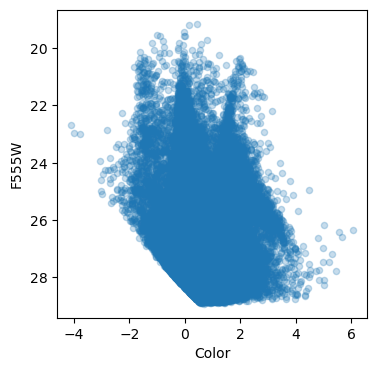

In [21]:
NGC2366_datos.plot.scatter(x='Color',y='F555W',alpha=0.25,figsize=(4,4)).invert_yaxis();


El método o función que agrego al final *.invert_yaxis()* es para que el eje F555W quede en una forma más conveniente para el uso astronómico, ya que menores valores de este filtro indican mayor brillo de la estrella.

Si lo hubiera realizado usando matplolib también hubiese sido posible, aunque es un poco más laborioso.
Veámoslo:

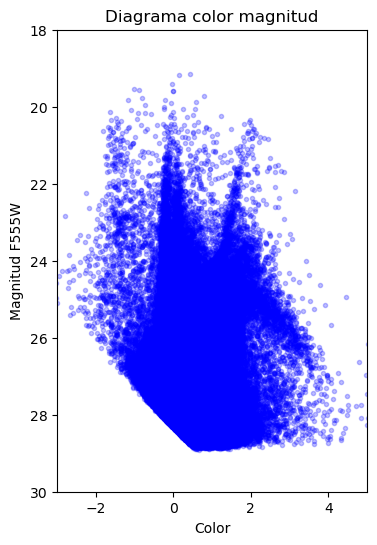

In [22]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(4,6))
plt.plot(NGC2366_datos['Color'], NGC2366_datos['F555W'], ".b",alpha=0.25)
plt.xlim([-3,5])  
plt.ylim([30,18])  #note que por razones de interpretación invertí el eje al igual que el gráfico anterior
plt.title("Diagrama color magnitud")
plt.xlabel("Color")
plt.ylabel("Magnitud F555W")
plt.show()

# Series temporales

Pandas es muy útil para estudiar series temporales, es decir eventos que van sucediendo durante 
cierto intervalo de tiempo los cuales por ejemplo, tengo registrados en un archivo.
Para ver como funciona Pandas con este tipo de situación generaremos una serie temporal con números al azar.
Para hacerla más interesante crearemos una segunda serie, pero ahora de los valores de la primera acumulados.
Es decir, el primer elemento es el primero de la segunda, pero el segundo elemento es primero mas el segundo y así continanos hasta el final.

Resumiendo:
* Entonces creo la serie de valores al azar y la inicio en el 1/1/2000 y genero 1000
valores al azar y los correspondo a 1000 días diferentes (inicio= 1/1/2000, período=1000)
* Acumulo esos valores en un segunda serie

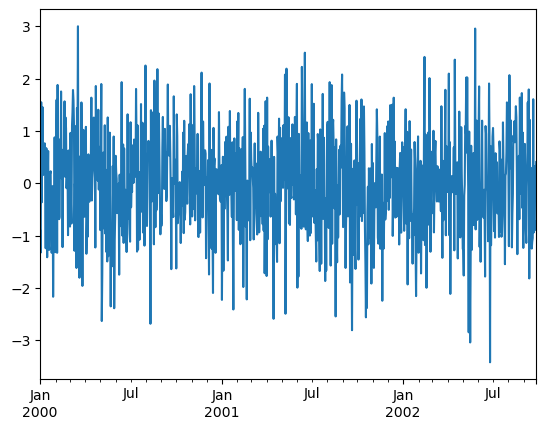

In [23]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts.plot();

Como se le indicó periodo 1000 mil días, tenemos simulados un poco menos de 3 años de datos.

Genero la serie acumulada y para ahorrar memoria utilizo la misma variable.

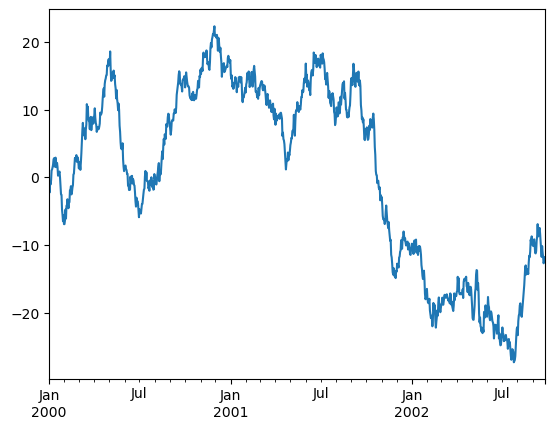

In [24]:
ts=ts.cumsum()
ts.plot();

Describo sus propiedades

In [25]:
ts.describe()

count    1000.000000
mean        0.738269
std        13.474958
min       -27.352746
25%       -11.141224
50%         3.904699
75%        12.704552
max        22.365586
dtype: float64

O en vez de una serie puedo crear varias que compartan el eje temporal y las guardo en un dataframe entero. Y todo
esto en muy pocas órdenes:

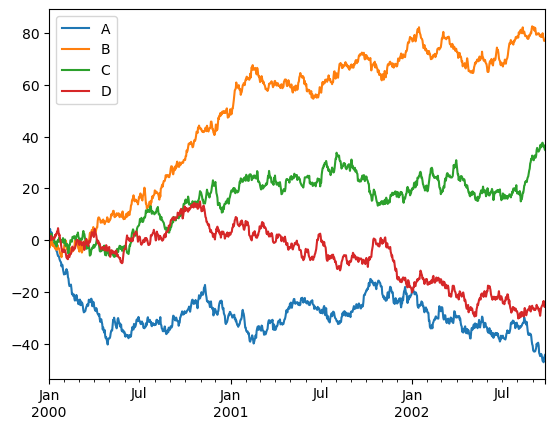

In [26]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df.plot();

Pero si me interesa graficar sólo uno de las curvas, la pido por su nombre: 

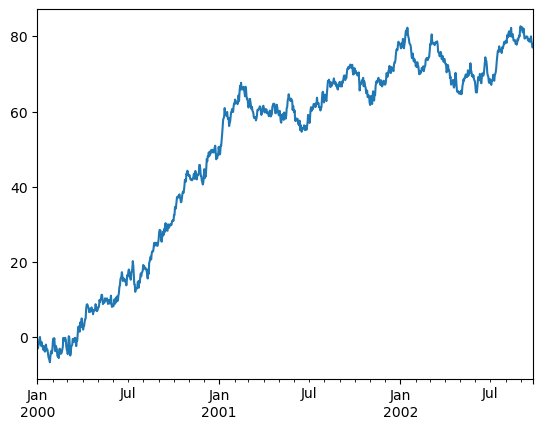

In [28]:
df['B'].plot();

O puedo graficar de a dos, indicando cuales quiero como en el ejemplo anterior

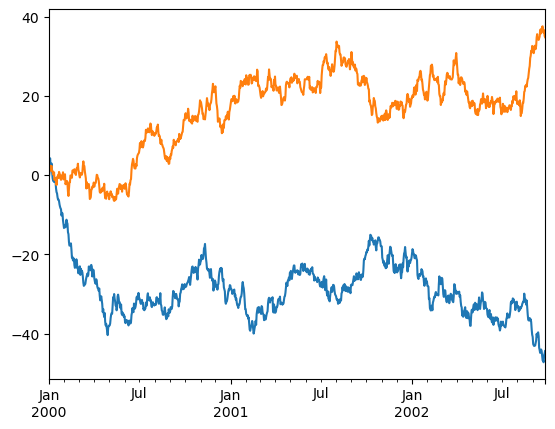

In [29]:
df['A'].plot()
df['C'].plot();

O graficar los puntos de 'A' contra los B, sin que se unan estos puntos con líneas (scatter plot in inglés).
Alpha es la semi tranparencia, para que se vea la sobreposición de puntos.

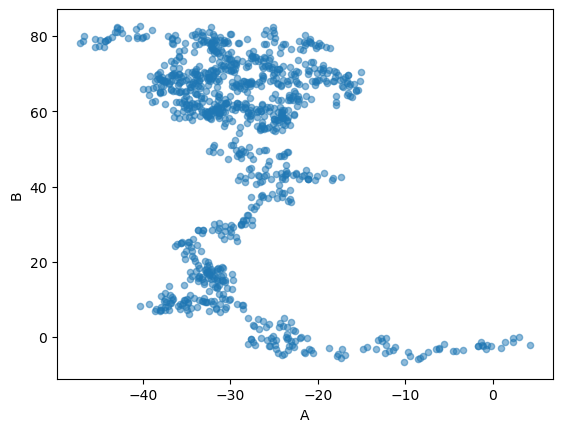

In [30]:
df.plot.scatter(x='A',y='B', alpha=0.5);

También puedo hacer que se dibuje un gráfico tipo box, donde se indica el valor medio y
el 20% de todos los puntos, indicando con negro los puntos "outliers" (que son los que 
estadísticamente no parecen pertenecer a la muestra).

In [ ]:
df.plot.box();

In [ ]:
df=df.abs()  # hago esto para que todos los valores sean positivos
df.plot.area(figsize=(12,4),subplots=True);

Y podemos también hacer histogramas
indicando el número de intervalos (el default es 10), pero
acá pedimos que sean 20 intervalos (o "bins" en inglés)

In [ ]:
df['A'].plot.hist(bins=20);

Pero también puedo hacerlo para todos los grupos al mismo tiempo:

In [ ]:
df.plot.hist(bins=20, alpha=0.5);

[<< Graficos en Python](Clase_4_Matplotlib.html) | [home](index.html) | [Astropy >>](Clase_Astropy.html)